In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Fish_Classification_Dataset.csv")

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Roach,102.30,17.76,19.34,21.48,5.74,3.16
1,Bream,997.50,39.90,43.05,48.83,18.50,6.69
2,Roach,62.79,15.02,16.56,18.47,4.82,2.57
3,Parkki,272.00,30.40,33.12,37.12,15.03,5.46
4,Perch,153.00,20.91,22.95,24.48,6.93,3.70


In [4]:
y = data["Weight"]
x = data.drop(columns = ["Species","Weight"] )
x.head() ,y.head()

(   Length1  Length2  Length3  Height  Width
 0    17.76    19.34    21.48    5.74   3.16
 1    39.90    43.05    48.83   18.50   6.69
 2    15.02    16.56    18.47    4.82   2.57
 3    30.40    33.12    37.12   15.03   5.46
 4    20.91    22.95    24.48    6.93   3.70,
 0    102.30
 1    997.50
 2     62.79
 3    272.00
 4    153.00
 Name: Weight, dtype: float64)

In [46]:
len(x),len(y)

(14000, 14000)

In [38]:
test_data = x.iloc[:3000]
test_targets = y.iloc[:3000]

train_data = x.iloc[len(test_data):-2000]
train_targets = y.iloc[len(test_targets):-2000]

predict_data = x.iloc[-2000:]
predict_targets = y.iloc[-2000:]

In [45]:
len(train_data),len(test_data),len(predict_data),

(9000, 3000, 2000)

In [12]:
np.array(train_data.iloc[0]),train_targets.iloc[0]

(array([28.63, 30.9 , 32.55,  7.84,  4.91]), 329.6)

In [13]:
train_data.shape, train_targets.shape

((9000, 5), (9000,))

In [14]:
test_data.shape, test_targets.shape

((3000, 5), (3000,))

In [15]:
train_data.iloc[0].shape

(5,)

In [39]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

predict_data -= mean
predict_data /= std

train_data.iloc[0]

Length1    0.170038
Length2    0.168476
Length3    0.075664
Height    -0.189435
Width      0.293772
Name: 3000, dtype: float64

In [17]:
from tensorflow.keras import models, layers

In [18]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(5,)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [19]:
history = model.fit(train_data, train_targets, epochs=500, verbose=0)

In [20]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

3000/3000 [==============================] - 0s 65us/sample - loss: 1779.9001 - mae: 23.3986


<Figure size 432x288 with 0 Axes>

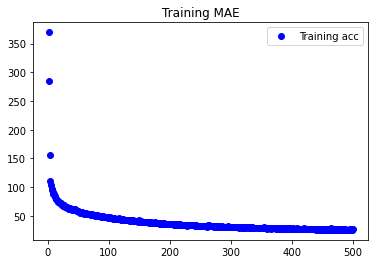

<Figure size 432x288 with 0 Axes>

In [21]:
import matplotlib.pyplot as plt

acc = history.history['mae']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training MAE')
plt.legend()
plt.figure()

In [25]:
model.save("weight_regression_model.h5")

In [223]:
from tensorflow.keras.models import load_model

loaded_model = load_model("weight_regression_model.h5")

In [29]:
def predict(n, data, label):
    
    inp = np.array(data[n]).reshape((1,5))  
    prediction = model.predict(inp)
    
    diff = float(prediction[0][0]) -  float(label[n])
    
    print("Predicted: %s"%(prediction[0][0]) + '\n' + "Actual   : %s"%(label[n])
         + '\n' + "Difference: %.2f"%(diff))

In [40]:
train_data = np.array(train_data)
train_targets = np.array(train_targets)

test_data = np.array(test_data)
test_targets = np.array(test_targets)

predict_data = np.array(predict_data)
predict_targets = np.array(predict_targets)

In [41]:
predict(1050,train_data,train_targets)
print()
predict(540,test_data,test_targets)

Predicted: 282.8584
Actual   : 285.0
Difference: -2.14

Predicted: 292.4946
Actual   : 286.2
Difference: 6.29


In [65]:
random = [12,450,1450,50,754,68,500,69,815,456,80,1569,147,558,214,897,1234,1895,1657,1748]
for i in random:
    predict(i,predict_data,predict_targets)
    print()

Predicted: 123.09001
Actual   : 110.4
Difference: 12.69

Predicted: 1660.5857
Actual   : 1600.0
Difference: 60.59

Predicted: 8.227145
Actual   : 8.92
Difference: -0.69

Predicted: 300.24973
Actual   : 312.0
Difference: -11.75

Predicted: 456.0033
Actual   : 510.0
Difference: -54.00

Predicted: 459.80823
Actual   : 471.9
Difference: -12.09

Predicted: 632.25305
Actual   : 630.0
Difference: 2.25

Predicted: 288.96713
Actual   : 290.0
Difference: -1.03

Predicted: 319.83136
Actual   : 333.96
Difference: -14.13

Predicted: -0.68401814
Actual   : 4.72
Difference: -5.40

Predicted: 58.69617
Actual   : 20.1
Difference: 38.60

Predicted: 140.1458
Actual   : 160.0
Difference: -19.85

Predicted: 459.5138
Actual   : 420.0
Difference: 39.51

Predicted: 460.3911
Actual   : 489.6
Difference: -29.21

Predicted: 299.95795
Actual   : 324.0
Difference: -24.04

Predicted: 1035.1055
Actual   : 1020.0
Difference: 15.11

Predicted: 110.09806
Actual   : 122.2
Difference: -12.10

Predicted: 9.750361
Actual  

# Predicting Old Data

In [47]:
old_data = pd.read_csv("Fish(old data).csv")

In [55]:
old_targets = np.array(old_data["Weight"])
old_data = np.array(old_data.drop(columns = ["Species","Weight"] ))

In [56]:
len(old_data),len(old_targets)

(159, 159)

In [57]:
old_data -= mean
old_data /= std

In [63]:
print(old_data[0])

[-0.24953694 -0.22686091 -0.09431259  0.5989758  -0.13833906]


In [62]:
predict(19,old_data,old_targets)
print()
predict(96,old_data,old_targets)
print()
predict(130,old_data,old_targets)

Predicted: 644.28125
Actual   : 650.0
Difference: -5.72

Predicted: 216.8013
Actual   : 225.0
Difference: -8.20

Predicted: 302.1056
Actual   : 300.0
Difference: 2.11
